In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cities = ['seattle','new_york']

df = {}
for c in cities:
    path = '../Data/%s/cycling_safety_%s.csv'%(c,c)
    df[c] = pd.read_csv(path)

In [3]:
list(df['seattle'].keys())

['Unnamed: 0',
 'X',
 'Y',
 'OBJECTID',
 'INCKEY',
 'COLDETKEY',
 'REPORTNO',
 'STATUS',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'SEVERITYCODE',
 'SEVERITYDESC',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'INJURIES',
 'SERIOUSINJURIES',
 'FATALITIES',
 'INCDATE',
 'INCDTTM',
 'JUNCTIONTYPE',
 'SDOT_COLCODE',
 'SDOT_COLDESC',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC',
 'SEGLANEKEY',
 'CROSSWALKKEY',
 'HITPARKEDCAR',
 'Date',
 'Latitude',
 'Longitude',
 'geometry',
 'index_right']

In [27]:
df['SEVERITY'].INJURIES.value_counts()

1    4979
0     686
2     132
3       9
5       1
Name: INJURIES, dtype: int64

In [33]:
list(df['new_york'].keys())

['Unnamed: 0',
 'CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5',
 'Date',
 'Longitude',
 'Latitude',
 'geometry',
 'index_right',
 'injury_b']

In [23]:
#make no injury - injury/fatality column for New York and Seattle

df['new_york']['injury_b'] = np.zeros(df['new_york'].shape[0]).astype(int) #0 will be flag for no injury, 1 is flag for injury/fatality
I1 = df['new_york']['NUMBER OF CYCLIST INJURED'] > 0
I2 = df['new_york']['NUMBER OF CYCLIST KILLED'] > 0
I = np.logical_or(I1,I2)
df['new_york'].loc[I,'injury_b'] = 1

In [28]:
df['seattle']['injury_b'] = np.zeros(df['seattle'].shape[0]).astype(int)
I1 = df['seattle']['SERIOUSINJURIES'] > 0 
I2 = df['seattle']['INJURIES'] > 0 
I3 = df['seattle']['FATALITIES'] > 0
I = np.logical_or(I1,I2,I3)
df['seattle'].loc[I,'injury_b'] = 1

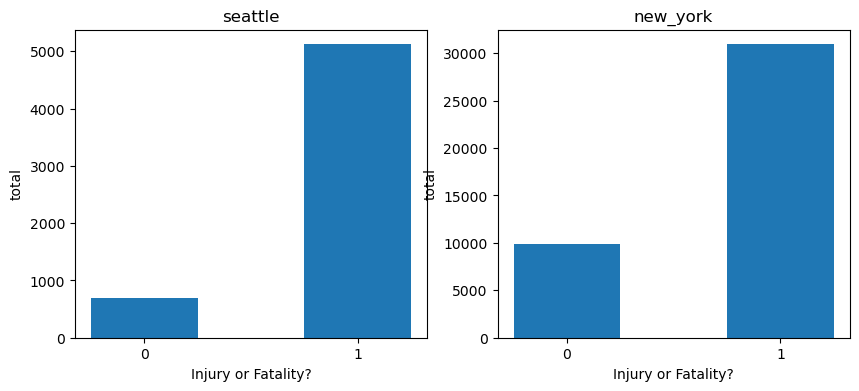

In [32]:
fig,ax = plt.subplots(1,2,figsize=(2*5,4))

edges = [-0.5,0.5,1.5]

ii=0
c = 'seattle'
ax[ii].hist(df[c]['injury_b'],bins=edges,rwidth=0.5)
ax[ii].set_title(c)
ax[ii].set_xlabel('Injury or Fatality?')
ax[ii].set_ylabel('total')
ax[ii].set_xticks([0,1])

ii=1
c = 'new_york'
ax[ii].hist(df[c]['injury_b'],bins=edges,rwidth=0.5)
ax[ii].set_title(c)
ax[ii].set_xlabel('Injury or Fatality?')
ax[ii].set_ylabel('total')
ax[ii].set_xticks([0,1])

plt.show()

In [35]:
df['new_york'].Date.sample(30)

13340    2013-06-25
39067    2014-09-14
7756     2019-05-08
4343     2019-08-04
25405    2017-05-08
535      2013-09-23
27916    2016-10-05
3312     2019-09-16
17957    2012-08-25
21560    2013-01-20
661      2020-01-15
34277    2015-09-14
24989    2017-05-28
37732    2015-01-06
6059     2019-06-26
34891    2015-08-20
16472    2018-05-09
11492    2018-10-14
2770     2019-10-09
23171    2017-08-21
31135    2016-06-14
33717    2015-09-26
8547     2019-03-17
12765    2013-08-22
1890     2014-05-23
23699    2017-07-18
40310    2014-06-29
25085    2017-05-20
27397    2016-11-06
2772     2019-10-18
Name: Date, dtype: object